In [1]:
from utils.constants import myoutput_path
import uproot
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import mplhep as hep

hep.style.use("ATLAS")

In [2]:
identifiers = ["Attempt1", "Benchmark"]
idenfier_legend_map = {
    "Attempt1": "BDT score fit",
    "Benchmark": "2D(Mjj + MT) fit",
}
# idenfier_legend_map = {
#     "Attempt1": "BDT method",
#     "Benchmark": "previous method",
# }

# identifier = identifiers[1]

limit_types = ["limits", "limits_sin"]
# limit_type_ylabel_map = {
#     "limits": r"95% CL upper limit on $\sigma \times$ BR",
#     "limits_sin": r"95% CL upper limit on $s_H$",
# }

limit_type_ylabel_map = {
    "limits": r"$\sigma \times \mathrm{B({\mathrm{H}_{5}^{\pm \pm}} \rightarrow WW )[fb]}$ ",
    "limits_sin": r"$s_H$",
}

# \times$ B({\mathrm{H}_{5}^{\pm \pm}} \rightarrow)[fb]

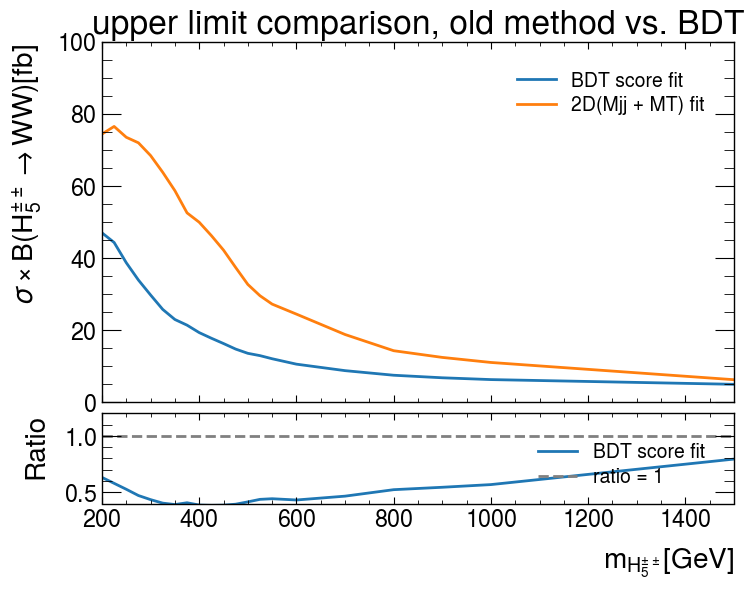

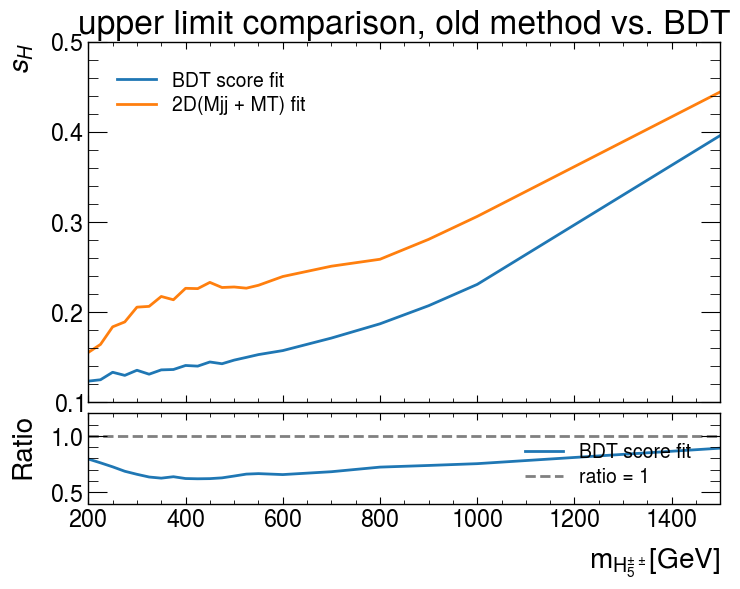

In [3]:
for limit_type in limit_types:
    results = dict.fromkeys(identifiers)
    for identifier in identifiers:
        limit_file = myoutput_path / identifier / "fit_output" / f"{limit_type}.root"
        limit_root = uproot.open(limit_file)
        mass_point, upper_limit = limit_root["exp"].values()
        results[identifier] = (mass_point, upper_limit)

    fig, (ax0, ax1) = plt.subplots(
        nrows=2, sharex=True, gridspec_kw={"height_ratios": [4, 1], "hspace": 0.05}
    )

    for identifier in identifiers:
        mass_point, upper_limit = results[identifier]
        ax0.plot(mass_point, upper_limit, label=idenfier_legend_map[identifier])

    ax0.set_xlim(200, 1500)
    ax0.legend()
    ax0.set_ylabel(limit_type_ylabel_map[limit_type])
    # plt.ylabel(rf"$\sigma \times $BR")
    ax0.set_title("upper limit comparison, old method vs. BDT")
    # fig.suptitle("upper limit comparison, cut-based vs. BDT")
    ax1.set_xlabel(r"$\mathrm{m_{\mathrm{H}_{5}^{\pm \pm}} [GeV]} $")

    ratio = results[identifiers[0]][1] / results[identifiers[1]][1]
    ax1.plot(mass_point, ratio, label=idenfier_legend_map[identifiers[0]])
    ax1.hlines(y=1, xmin=200, xmax=1500, color="gray", linestyle="--", label="ratio = 1")
    ax1.set_ylabel("Ratio")
    ax1.set_ylim(0.4, 1.2)
    ax1.legend()

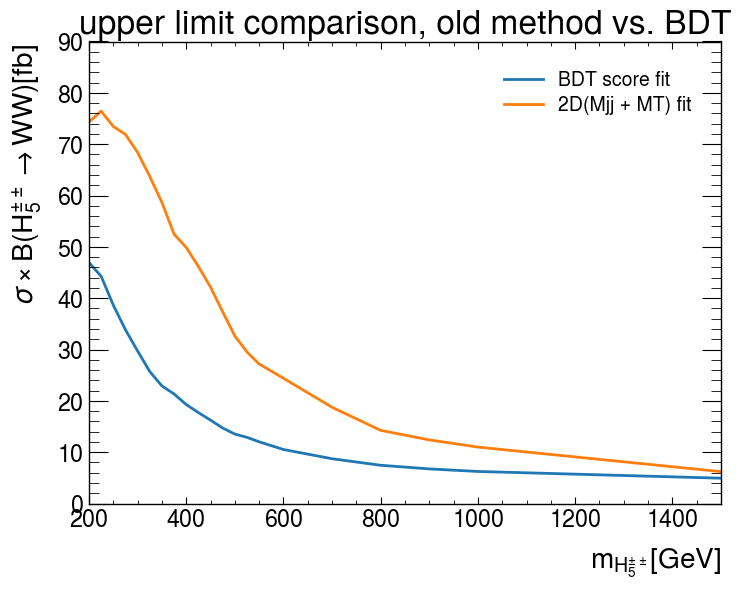

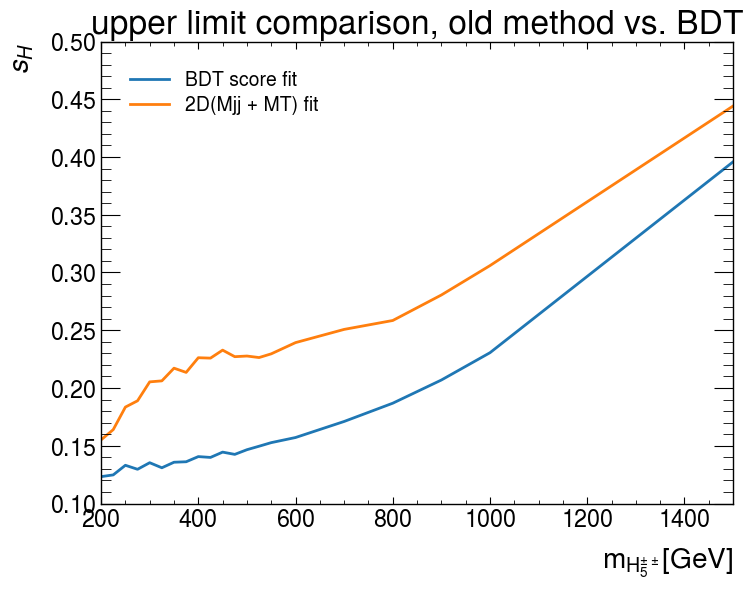

In [4]:
for limit_type in limit_types:
    results = dict.fromkeys(identifiers)
    for identifier in identifiers:
        limit_file = myoutput_path / identifier / "fit_output" / f"{limit_type}.root"
        limit_root = uproot.open(limit_file)
        mass_point, upper_limit = limit_root["exp"].values()
        results[identifier] = (mass_point, upper_limit)

    fig, ax0 = plt.subplots()

    for identifier in identifiers:
        mass_point, upper_limit = results[identifier]
        ax0.plot(mass_point, upper_limit, label=idenfier_legend_map[identifier])

    ax0.set_xlim(200, 1500)
    ax0.legend()
    ax0.set_ylabel(f"{limit_type_ylabel_map[limit_type]}")
    # plt.ylabel(rf"$\sigma \times $BR")
    # ax0.set_title("upper limit comparison, cut-based vs. BDT")
    ax0.set_title("upper limit comparison, old method vs. BDT")
    # fig.suptitle("upper limit comparison, cut-based vs. BDT")
    ax0.set_xlabel(r"$\mathrm{m_{\mathrm{H}_{5}^{\pm \pm}} [GeV]} $")

In [5]:
mass_point

array([ 200.,  225.,  250.,  275.,  300.,  325.,  350.,  375.,  400.,
        425.,  450.,  475.,  500.,  525.,  550.,  600.,  700.,  800.,
        900., 1000., 1500.])

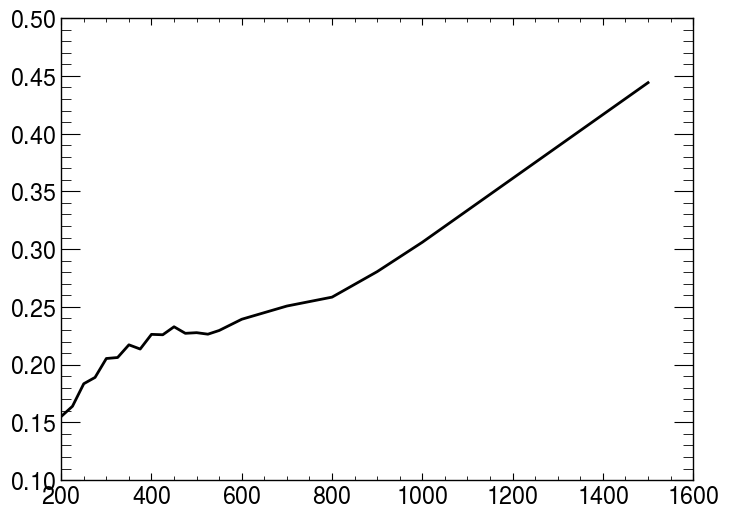

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(mass_point, upper_limit, label="Expected", color="black")

In [8]:
import mplhep as hep

hep.style.use(hep.style.ATLAS)

(exptext: Custom Text(0.05, 0.95, 'ATLAS'),
 expsuffix: Custom Text(0.05, 0.955, 'Work in Progress'),
 expsuffix: Custom Text(0.05, 0.95, '$\\sqrt{s} = \\mathrm{13\\ TeV}, 139\\ \\mathrm{fb}^{-1}$'))

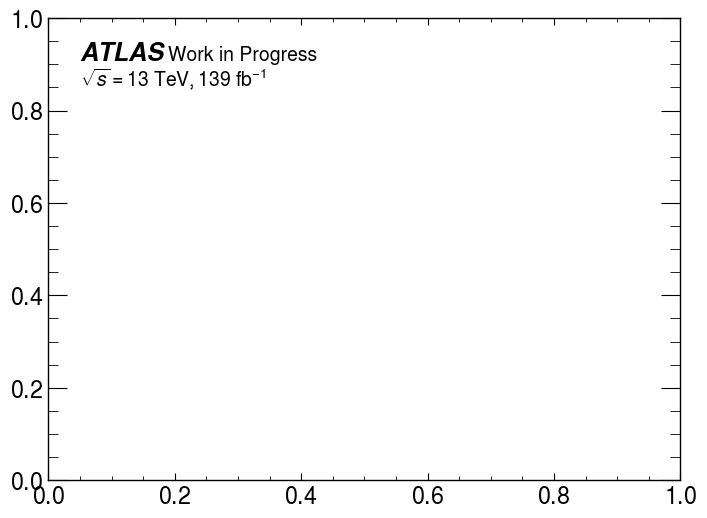

In [14]:
hep.atlas.label(label="Work in Progress", data=True, lumi=139, year=2017)